In [ ]:
# Kaggle API 키 설정
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

# Kaggle 데이터 다운로드
!kaggle datasets download -d jonathansilva2020/orange-diseases-dataset
!unzip /content/orange-diseases-dataset.zip -d /content/orange-diseases-dataset


Dataset URL: https://www.kaggle.com/datasets/jonathansilva2020/orange-diseases-dataset
License(s): CC-BY-NC-SA-4.0
 99% 137M/138M [00:07<00:00, 21.1MB/s]
100% 138M/138M [00:07<00:00, 19.8MB/s]
Archive:  /content/orange-diseases-dataset.zip
  inflating: /content/orange-diseases-dataset/test/blackspot/b (1).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (10).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (11).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (12).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (13).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (14).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (15).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (16).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (17).jpg  
  inflating: /content/orange-diseases-dataset/test/blackspot/b (18).jpg  
  inflating: /content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/colab/orange-diseases-dataset.zip -d orange-diseases-dataset

Archive:  /content/drive/MyDrive/colab/orange-diseases-dataset.zip
  inflating: orange-diseases-dataset/test/blackspot/b (1).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (10).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (11).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (12).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (13).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (14).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (15).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (16).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (17).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (18).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (19).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (2).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (20).jpg  
  inflating: orange-diseases-dataset/test/blackspot/b (21).jpg  
  inflating: orange-disea

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로 설정
data_dir = "/content/orange-diseases-dataset"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# 클래스 확인
classes = os.listdir(train_dir)
print("클래스 목록:", classes)

클래스 목록: ['canker', 'blackspot', 'fresh', 'grenning']


In [ ]:
# 이미지 크기 및 배치 설정
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

# 데이터 증강 적용
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# 데이터 불러오기
train_data = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)

val_data = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="categorical"
)


Found 991 images belonging to 4 classes.
Found 99 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import EfficientNetV2S
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# EfficientNetV2 모델 불러오기 (Pretrained weights 사용)
base_model = EfficientNetV2S(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# 기존 가중치 동결 (전이 학습)
base_model.trainable = False

# 분류기 추가
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(len(classes), activation="softmax")(x)  # 클래스 개수만큼 출력 노드 설정

# 모델 생성
model = Model(inputs=base_model.input, outputs=x)

# 모델 컴파일
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 모델 요약 출력
model.summary()


82420632/82420632 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 128, 128, 24)   │            648 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 128, 128, 24)   │             96 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 128, 128, 24)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 128, 128, 24)   │          5,184 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 128, 128, 24)   │             96 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 128, 128, 24)   │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_add (Add)         │ (None, 128, 128, 24)   │              0 │ block1a_project_activ… │
│                           │                        │                │ stem_activation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 128, 128, 24)   │          5,184 │ block1a_add[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 128, 128, 24)   │             96 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 128, 128, 24)   │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 128, 128, 24)   │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 128, 128, 24)   │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_add[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 20,660,324 (78.81 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 20,331,360 (77.56 MB)

In [ ]:
# 모델 학습 설정
EPOCHS = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.5510 - loss: 1.1072 - val_accuracy: 0.7980 - val_loss: 0.6545
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 546ms/step - accuracy: 0.6235 - loss: 0.9192 - val_accuracy: 0.7879 - val_loss: 0.7032
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 534ms/step - accuracy: 0.6912 - loss: 0.7777 - val_accuracy: 0.7172 - val_loss: 0.7472
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 531ms/step - accuracy: 0.6931 - loss: 0.7807 - val_accuracy: 0.7071 - val_loss: 0.7881
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 531ms/step - accuracy: 0.7083 - loss: 0.7198 - val_accuracy: 0.7980 - val_loss: 0.6099
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 530ms/step - accuracy: 0.7473 - loss: 0.7179 - val_accuracy: 0.7071 - val_loss: 0.7417
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 535ms/step - accuracy: 0.7243 - loss: 0.7010 - val_accuracy: 0.8081 - val_loss: 0.6078
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 535ms/step - accuracy: 0.7200 - loss: 0.7067 - val_accura

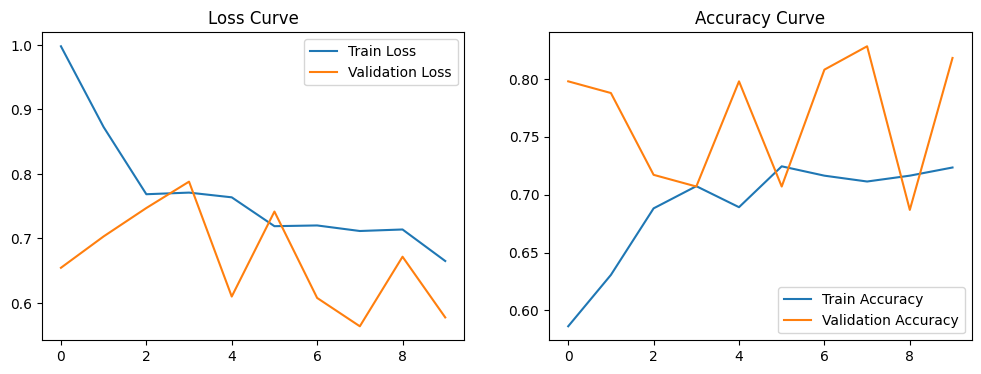

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

In [ ]:
# 일부 레이어를 학습 가능하도록 설정
base_model.trainable = True

# 모델 재컴파일 (학습률 낮춤)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])

# 추가 학습
EPOCHS_FINE_TUNE = 5

history_finetune = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS_FINE_TUNE,
    verbose=1
)


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.4148 - loss: 1.6718 - val_accuracy: 0.4343 - val_loss: 1.5313
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 536ms/step - accuracy: 0.7785 - loss: 0.5073 - val_accuracy: 0.6061 - val_loss: 0.9036
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 534ms/step - accuracy: 0.8452 - loss: 0.3848 - val_accuracy: 0.8687 - val_loss: 0.3165
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 545ms/step - accuracy: 0.8909 - loss: 0.2738 - val_accuracy: 0.9192 - val_loss: 0.2156
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 544ms/step - accuracy: 0.9151 - loss: 0.2329 - val_accuracy: 0.9596 - val_loss: 0.1820


In [ ]:
# 검증 데이터 평가
val_loss, val_acc = model.evaluate(val_data)
print(f"✅ Validation Accuracy: {val_acc:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9588 - loss: 0.1736 
✅ Validation Accuracy: 0.9596


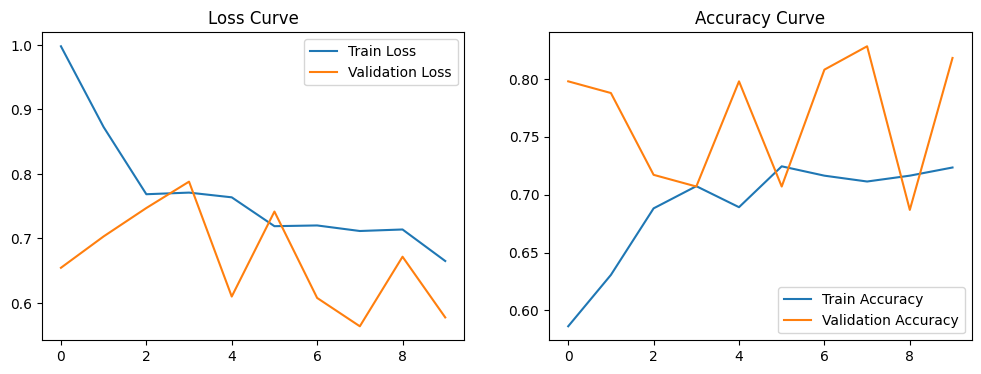

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.show()

🎯 최종 정리
✅ EfficientNetV2를 활용한 오렌지 질병 분류 모델 구현
✅ 전이 학습 (Pretrained Weights) + Fine-Tuning 적용
✅ 데이터 증강(Image Augmentation) 활용하여 성능 향상

📌 향후 개선 가능성:

더 많은 데이터 확보
모델 구조 변경 (예: EfficientNetV2-M, ResNet 비교 실험)
데이터 증강 기법 추가 (CutMix, MixUp 등)
이제 학습된 모델을 사용하여 실제 이미지를 테스트해볼 수 있습니다! 🚀
추가 질문이 있으면 언제든지 알려주세요. 😊